# Data Analysis: Coronavirus and Crimes at New York City

In this analysis we hope to discover a relationship between the coronavirus and crimes in New York City (NYC). We believe that factors due to the coronavirus such as the economic crisis and people staying home may affect the number and type of crimes that occur. Especially, we focus on 2 types of crimes: burglary and robbery. 

Definitions:  
Burglary - entry into a building illegally with intent to commit a crime, especially theft.  
Robbery - the action of taking property unlawfully from a person or place by force or threat of force.

We have 3 reasons why we chose these 2 crimes:  
1. When the economy is declining, burglary and robbery seem to be crimes that are likely to increase
2. There were higher demands for necessity goods, with stores having sold out items, which may also increase the number of cases for burglary and robbery
3. Finally, it is because we are able to collect all of the burglary and robbery cases from March 1st to March 22nd for the years 2018~2020 in NYC from SpotCrime (https://spotcrime.com/ny/new+york).

The analysis we plan to show are the following:
- Difference in the total number of burglary and robbery cases of March 1~22, 2018~2020
- Difference in the daily number of burglary and robbery cases in March 1~22, 2020
- Concentration of the location of burglary and robbery cases

We explain the reasoning behind why we chose these analysis later in each section.

But before the analysis, we preprocess the crime data.

## Preprocessing

The data in SpotCrime was in the form of tables, which we copy-pasted onto an Excel workbook. 

(Although it was in the form of tables in SpotCrime, after the copy-paste the format changed so preprocessing became needed.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Excel File can be found on Github

# example url:
# https://spotcrime.com/ny/new+york?fbclid=IwAR2FShJaYSxrtwilE4tXlZINExpSfSJcZWA5TnCWpOaiLQL6iA0hXAsmSTM#crime-info

burg_2018_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2018Burg')
rob_2018_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2018Rob')
burg_2019_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2019Burg')
rob_2019_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2019Rob')
burg_2020_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2020Burg')
rob_2020_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2020Rob')

# Data collected from https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf
corona_cases_df = pd.read_excel('CoronaNYCCases.xlsx', sheet_name='CoronaNYCCases')

In [3]:
# Function to organize the data into a clean form with the columns ['crime_type', 'date', 'address']
def organize_df(df):
    crime_type = df.iloc[0::3]
    crime_type.reset_index(drop=True, inplace=True)
    date = df.iloc[1::3]
    date.reset_index(drop=True, inplace=True)
    address = df.iloc[2::3]
    address.reset_index(drop=True, inplace=True)
    combined = pd.concat([crime_type, date, address], axis=1)
    combined.columns = ['crime_type', 'date', 'address']
    return combined

In [4]:
# Organize each data of each sheet, and concatenate all of them
burg_2018_df = organize_df(burg_2018_df)
rob_2018_df = organize_df(rob_2018_df)
burg_2019_df = organize_df(burg_2019_df)
rob_2019_df = organize_df(rob_2019_df)
burg_2020_df = organize_df(burg_2020_df)
rob_2020_df = organize_df(rob_2020_df)
full_df = pd.concat([burg_2018_df, rob_2018_df, burg_2019_df, rob_2019_df, burg_2020_df, rob_2020_df], axis=0)
full_df.reset_index(inplace=True, drop=True)

# Output full concatenated dataframe as csv file
full_df.to_csv('nycrimes_mar_2018_to_2020.csv')

In [5]:
# Read full burglary and robbery csv file
df = pd.read_csv('nycrimes_mar_2018_to_2020.csv', index_col=0, parse_dates=['date'])
df.head()

,crime_type,date,address
0,Burglary,2018-03-08,300 BLOCK OF 43RD ST
1,Burglary,2018-03-08,NaN
2,Burglary,2018-03-08,200 BLOCK OF HUMBOLDT ST
3,Burglary,2018-03-08,350-398 W 49TH ST
4,Burglary,2018-03-08,100 BLOCK OF E BROADWAY


## Difference in the total number of burglary and robbery cases of March 1-22, 2018-2020

The goal of this analysis is to see whether there is a seemingly abnormal increase/decrease in the total number of crimes that occurred through March 1-22 for years 2018-2020

In [6]:
burglary_df = df[df['crime_type']=='Burglary']
robbery_df = df[df['crime_type']=='Robbery']
years_list = np.unique(df.date.dt.year)

burglary_count_l = []
robbery_count_l = []
len(df[df.date.dt.year==2018])
for year in years_list:
    burglary_count_l.append(len(burglary_df[burglary_df.date.dt.year==year]))
    robbery_count_l.append(len(robbery_df[robbery_df.date.dt.year==year]))

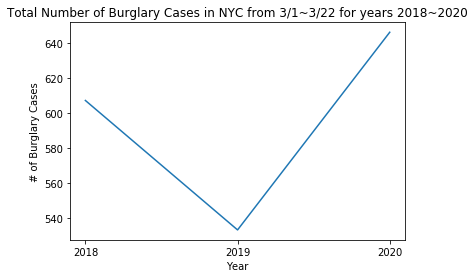

In [7]:
plt.plot(years_list, burglary_count_l)
plt.xticks(np.arange(years_list[0], years_list[-1]+1), labels=years_list)
plt.title('Total Number of Burglary Cases in NYC from 3/1~3/22 for years 2018~2020')
plt.xlabel('Year')
plt.ylabel('# of Burglary Cases')
plt.show()

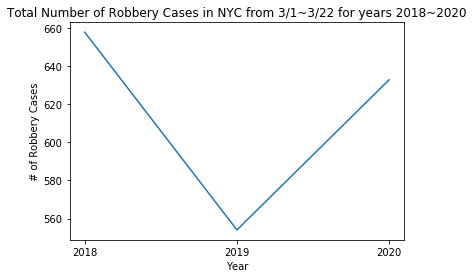

In [8]:
plt.plot(years_list, robbery_count_l)
plt.xticks(np.arange(years_list[0], years_list[-1]+1), labels=years_list)
plt.title('Total Number of Robbery Cases in NYC from 3/1~3/22 for years 2018~2020')
plt.xlabel('Year')
plt.ylabel('# of Robbery Cases')
plt.show()

From the two graphs, we cannot say confidently that there was a increase/decrease in burglary or robbery cases during March 1~22 for 2020. This means that despite the movement to keep people at home, the number of burglary and robbery cases haven't been decreasing. This may mean that the chances of crime occurring when people are outside are higher, assuming that there are more people staying at home.

## Difference in the daily number of burglary and robbery cases in March 1~22, 2020

The goal of this analysis is to see whether there is a seemingly abnormal increase/decrease during the period of March 1- March 22 in year 2020

In [9]:
burglary_2020_df = burglary_df[burglary_df.date.dt.year==2020]
robbery_2020_df = robbery_df[robbery_df.date.dt.year==2020]
day_list = np.arange(1,23)

burglary_daily_count_l = []
robbery_daily_count_l = []

for day in day_list:
    burglary_daily_count_l.append(len(burglary_2020_df[burglary_2020_df.date.dt.day==day]))
    robbery_daily_count_l.append(len(robbery_2020_df[robbery_2020_df.date.dt.day==day]))

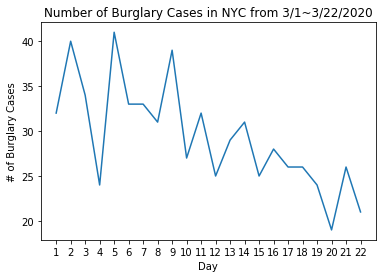

In [10]:
plt.plot(day_list, burglary_daily_count_l)
plt.xticks(np.arange(day_list[0], day_list[-1]+1), labels=day_list)
plt.title('Number of Burglary Cases in NYC from 3/1~3/22/2020')
plt.xlabel('Day')
plt.ylabel('# of Burglary Cases')
plt.show()

There seems to be a decrease in the number of burglary cases as days are progressing. Intuitively, this is because it is more likely that there are people inside the building due to the coronavirus, which prevents burglars from entering the building to commit crimes.  
We plot the daily number of positive coronavirus cases below, and calculate the correlation.

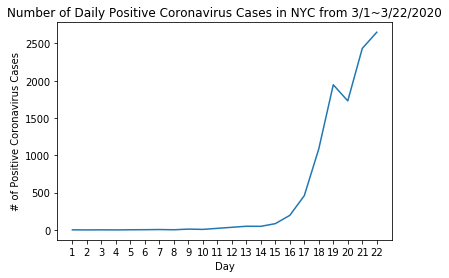

In [11]:
plt.plot(day_list, corona_cases_df.Cases)
plt.xticks(np.arange(day_list[0], day_list[-1]+1), labels=day_list)
plt.title('Number of Daily Positive Coronavirus Cases in NYC from 3/1~3/22/2020')
plt.xlabel('Day')
plt.ylabel('# of Positive Coronavirus Cases')
plt.show()

In [12]:
np.corrcoef(burglary_daily_count_l, corona_cases_df.Cases)

array([[ 1.        , -0.60099685],
       [-0.60099685,  1.        ]])

We can find a negative correlation of -0.6 between the daily number of burglary cases and positive coronavirus cases.

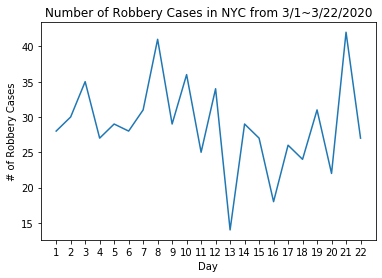

In [13]:
plt.plot(day_list, robbery_daily_count_l)
plt.xticks(np.arange(day_list[0], day_list[-1]+1), labels=day_list)
plt.title('Number of Robbery Cases in NYC from 3/1~3/22/2020')
plt.xlabel('Day')
plt.ylabel('# of Robbery Cases')
plt.show()

The number of robbery cases do not seem to change regardless of the increasing trend of people staying at home. Since robbery is theft by force or threat of force, it can be hypothesized that criminals may commit robbery regardless of whether a person is there or not.  
We also calculate the correlation against the number of positive coronavirus cases.

In [14]:
np.corrcoef(robbery_daily_count_l, corona_cases_df.Cases)

array([[1.        , 0.09146265],
       [0.09146265, 1.        ]])

There is no correlation (=0.09) between the daily number of robbery cases and positive coronavirus cases.

## Concentration of the location of burglary and robbery cases

This analysis focuses on locations of burglary and robbery cases using heatmap visulization through Carto, we want to exam if there is any abnormal concentration on the map and it may help with the checking of where crimes are concentrated.

In [8]:
from IPython.display import Image
Image(filename='h2018.png') 

FileNotFoundError: [Errno 2] No such file or directory: 'h2018.png'

## Summary